### QUEST

- 주차별 환자 입원/퇴원 추이 시각화
- 요일별 환자 입원/퇴원 추이 시각화

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(4)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.0,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.2,4,Down,0


In [3]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

In [4]:
df_ROS_date = df_ROS[['입원일자','퇴원일자']].astype(str)
df_ROS_date

,입원일자,퇴원일자
0,20190713,20190716
1,20190715,20190716
2,20190729,20190801
3,20190731,20190803
4,20190903,20190907
...,...,...
1889,20170407,20170408
1890,20170426,20170429
1891,20170410,20170412
1892,20170408,20170411


In [5]:
df_ROS_date['입원일자_datetime_month'] = pd.to_datetime(df_ROS_date['입원일자']).copy()

In [6]:
df_ROS_date['입원일자_datetime_week'] = pd.to_datetime(df_ROS_date['입원일자']).copy()

In [7]:
df_ROS_date['입원일자_datetime_day'] = pd.to_datetime(df_ROS_date['입원일자'])

In [8]:
df_ROS_date['퇴원일자_datetime_month'] = pd.to_datetime(df_ROS_date['퇴원일자']).copy()

In [9]:
df_ROS_date['퇴원일자_datetime_week'] = pd.to_datetime(df_ROS_date['퇴원일자']).copy()

In [10]:
df_ROS_date['퇴원일자_datetime_day'] = pd.to_datetime(df_ROS_date['퇴원일자'])

In [11]:
df_ROS_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   입원일자                 1894 non-null   object        
 1   퇴원일자                 1894 non-null   object        
 2   입원일자_datetime_month  1894 non-null   datetime64[ns]
 3   입원일자_datetime_week   1894 non-null   datetime64[ns]
 4   입원일자_datetime_day    1894 non-null   datetime64[ns]
 5   퇴원일자_datetime_month  1894 non-null   datetime64[ns]
 6   퇴원일자_datetime_week   1894 non-null   datetime64[ns]
 7   퇴원일자_datetime_day    1894 non-null   datetime64[ns]
dtypes: datetime64[ns](6), object(2)
memory usage: 118.5+ KB


In [12]:
df_ROS_date['입원일자_datetime_month'] = df_ROS_date['입원일자_datetime_month'].dt.month

In [13]:
df_ROS_date['입원일자_datetime_week'] = df_ROS_date['입원일자_datetime_week'].dt.weekofyear

C:\Users\01-10\AppData\Local\Temp\ipykernel_4344\3034501913.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_ROS_date['입원일자_datetime_week'] = df_ROS_date['입원일자_datetime_week'].dt.weekofyear


In [14]:
df_ROS_date['입원일자_datetime_day'] = df_ROS_date['입원일자_datetime_day'].dt.day_name()

In [15]:
df_ROS_date['퇴원일자_datetime_month'] = df_ROS_date['퇴원일자_datetime_month'].dt.month

In [16]:
df_ROS_date['퇴원일자_datetime_week'] = df_ROS_date['퇴원일자_datetime_week'].dt.weekofyear

C:\Users\01-10\AppData\Local\Temp\ipykernel_4344\3828872689.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_ROS_date['퇴원일자_datetime_week'] = df_ROS_date['퇴원일자_datetime_week'].dt.weekofyear


In [17]:
df_ROS_date['퇴원일자_datetime_day'] = df_ROS_date['퇴원일자_datetime_day'].dt.day_name()

In [18]:
df_ROS_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   입원일자                 1894 non-null   object
 1   퇴원일자                 1894 non-null   object
 2   입원일자_datetime_month  1894 non-null   int64 
 3   입원일자_datetime_week   1894 non-null   int64 
 4   입원일자_datetime_day    1894 non-null   object
 5   퇴원일자_datetime_month  1894 non-null   int64 
 6   퇴원일자_datetime_week   1894 non-null   int64 
 7   퇴원일자_datetime_day    1894 non-null   object
dtypes: int64(4), object(4)
memory usage: 118.5+ KB


In [20]:
df_ROS_date.describe()

,입원일자_datetime_month,입원일자_datetime_week,퇴원일자_datetime_month,퇴원일자_datetime_week
count,1894.000000,1894.000000,1894.000000,1894.000000
mean,5.973601,24.027983,5.875396,23.748152
std,3.791215,16.404609,3.758603,16.339001
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,9.000000,2.000000,9.000000
50%,6.000000,22.000000,5.000000,22.000000
75%,10.000000,40.000000,10.000000,40.000000
max,12.000000,52.000000,12.000000,53.000000


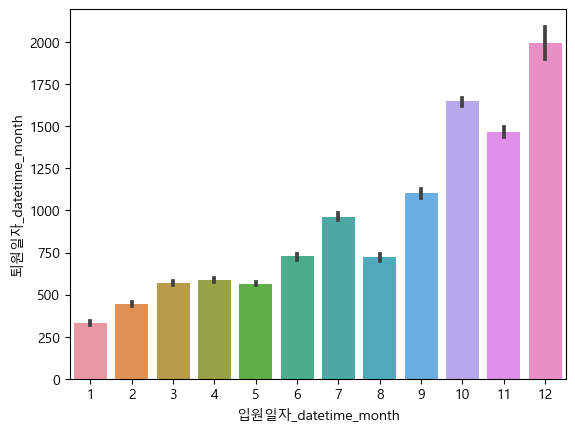

In [27]:
sns.barplot(data=df_ROS_date, x='입원일자_datetime_month', y='퇴원일자_datetime_month',estimator='sum')
plt.show()

#### 입원일자는 보통 6일이상 최대 12일이 많았다. 이걸로 보아 수술 후 회복기간은 일주일 정도로 볼 수 있다.

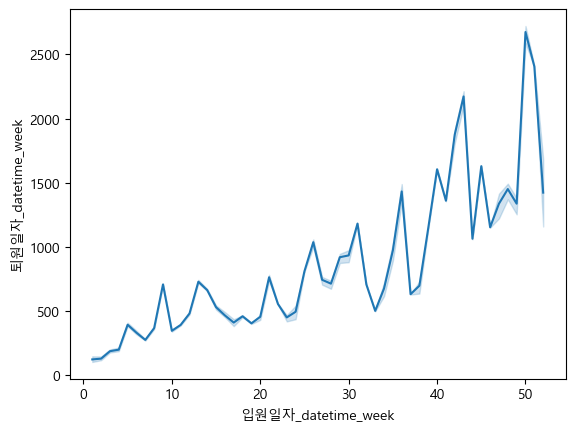

In [19]:
sns.lineplot(data=df_ROS_date, x='입원일자_datetime_week', y='퇴원일자_datetime_week',estimator='sum')
plt.show()

#### 상반기 보다 하반기에 수술을 많이 하였다. 또한 겨울 특정 주수에 수술이 다른 계절에 비해 많은 걸로 보아 빙판길 사고로 인한 결과로 보인다.

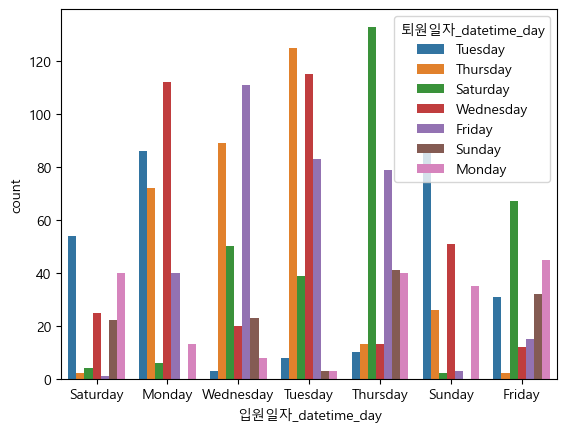

In [21]:
sns.countplot(data=df_ROS_date, x='입원일자_datetime_day', hue='퇴원일자_datetime_day')
plt.show()

<Axes: xlabel='퇴원일자_datetime_week', ylabel='count'>

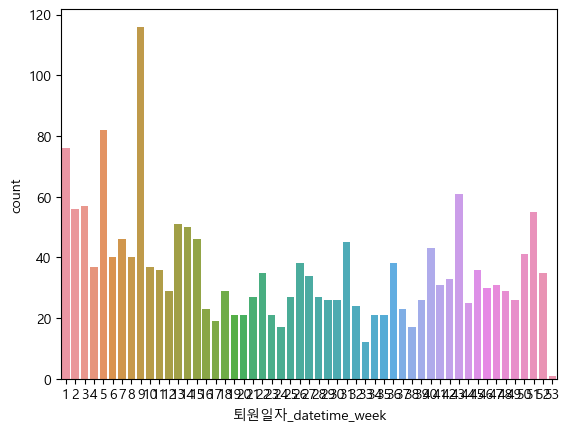

In [28]:
sns.countplot(data=df_ROS_date, x='퇴원일자_datetime_week')

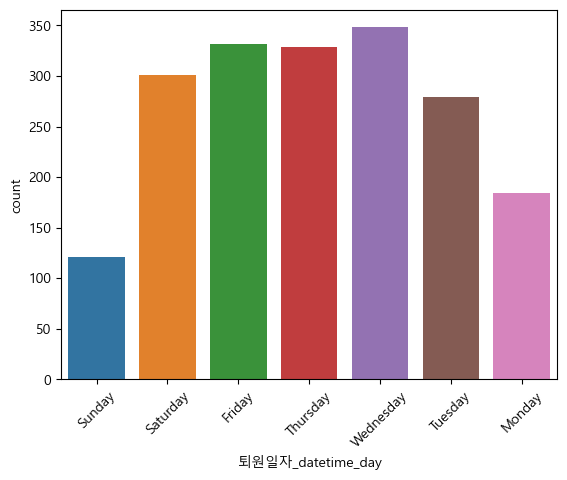

In [42]:
day_order = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']
sns.countplot(data=df_ROS_date, x='퇴원일자_datetime_day',order=day_order)

plt.xticks(rotation=45)  # x축 라벨 회전
plt.show()

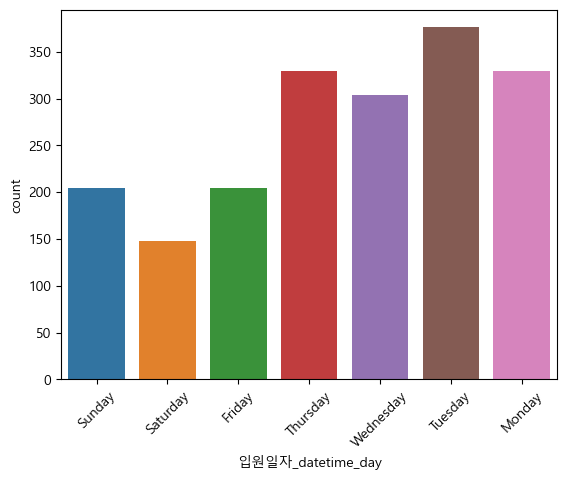

In [40]:
day_order = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']
sns.countplot(data=df_ROS_date, x='입원일자_datetime_day',order=day_order)
plt.xticks(rotation=45)  # x축 라벨 회전
plt.show()

In [41]:
#### 일요일 월요일에 퇴원하는 사람이 적을 걸로 보아 일요일은